In [1]:
import os
import shutil
import random
import numpy as np
import pandas as pd
from typing import Literal
import matplotlib.pyplot as plt
import PIL.Image as Image
from glob import glob
import torch
import patchify

import warnings
warnings.filterwarnings('ignore')

In [2]:
class config:

    train_img_path = 'stranger-sections-2-train-data/image'
    train_label_path = 'stranger-sections-2-train-data/label'
    root_dir = 'stranger-sections-2-train-data'

    test_img_path = 'stranger-sections-2-test-data/test_images/'
    patches_256 = 'patches_256/lab/'
    test_patches = 'patches_256/test_images/'

In [5]:
train_img_list = os.listdir(config.train_img_path)
train_label_list = os.listdir(config.train_label_path)
test_img_list = os.listdir(config.test_img_path)
#patch_list_256 = os.listdir(config.patches_256)
#test_patch_list = os.listdir(config.test_patches)

print(len(train_img_list), len(train_label_list))

113 113


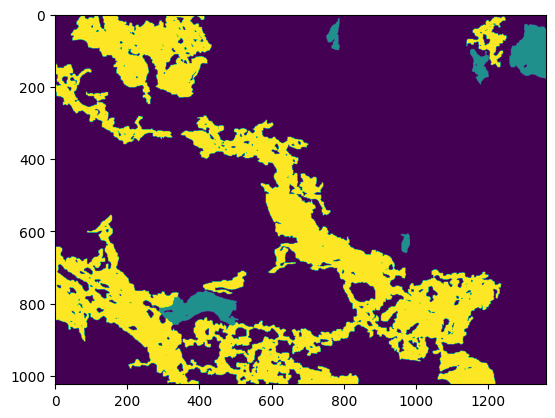

In [8]:
mask = np.load(os.path.join(config.train_label_path, 'tpb83i_gt.npy'))  #grqhu2_gt hsa12q_gt tpb83i_gt
plt.imshow(mask)

In [ ]:
empty_patches = [] 
for p_name in train_patch_names: 
    name = os.path.splitext(p_name)[0] 
    label_name = os.path.join('/kaggle/working/patches/train_labels/', f'{name}_gt.npy') 
    mask = np.load(label_name) 
    if len(np.unique(mask)) == 1: 
        if np.unique(mask)[0] == 0: 
            empty_patches.append(f'{name}_gt.npy')

print(len(empty_patches))

In [6]:
Inertinite = []
Vitrinite = []
Liptinite = []
empty = []


filenames = ['79h0ma', 'tpb83i', 'vutdxm', 'wo91nj', 'ynfeq0', 'ypbf6w', 'zjl4vx']

for train_path in patch_list_256:
    file_name = os.path.splitext(train_path)[0]
    f_name = file_name.split('_')[:2]
    base_name = f_name[0]
    if base_name in filenames:
        f_name = f"{f_name[0]+'_'+f_name[1]}"
        label = np.load(os.path.join(config.patches_256, f'{file_name}.npy'))
        unique_labels = np.unique(label)
        
        if len(unique_labels) == 1:
            if unique_labels[0] == 0:
                empty.append(f_name)
            elif unique_labels[0] == 1:
                Inertinite.append(f_name)
            elif unique_labels[0] == 2:
                Vitrinite.append(f_name)
            elif unique_labels[0] == 3:
                Liptinite.append(f_name)
        else:
            if 1 in unique_labels:
                Inertinite.append(f_name)
            if 2 in unique_labels:
                Vitrinite.append(f_name)
            if 3 in unique_labels:
                Liptinite.append(f_name)

print("Inertinite:", len(Inertinite), "Vitrinite:", len(Vitrinite), "Liptinite:", len(Liptinite), "Empty:", len(empty))

Inertinite: 7 Vitrinite: 34 Liptinite: 24 Empty: 109


In [24]:
Inertinite = []
Vitrinite = []
Liptinite = []
Empty = []

filenames = ['79h0ma', 'tpb83i', 'vutdxm', 'wo91nj', 'ynfeq0', 'ypbf6w', 'zjl4vx']
#filenames = ['20di1f','wo91nj','wibu50', 'zsr74n', 'ylhm05', '7iatmd', 'vdf9qx', 'z7i0cm', 'z768ym', 'vwmu3o', '795qky', 'yzk67d']

original_list = sorted(os.listdir(config.patches_256))
for train_path in original_list:
    file_name = train_path.split('.')[0]
    base_name = file_name.split('_')[0]
    if base_name not in filenames:
        label = np.load(os.path.join(config.patches_256, f'{file_name}.npy'))
        if 1 in label:
            Inertinite.append(file_name)
        elif 2 in label:
            Vitrinite.append(file_name)
        elif 3 in label:
            Liptinite.append(file_name)
        else:
            Empty.append(file_name)
    

print(len(Inertinite), len(Vitrinite), len(Liptinite), len(Empty))

167 304 297 1152


In [18]:
file_name.split('_')[0]

'zye2k6'

In [14]:
def remove_files_from_directory(file_list, directory):
    for filename in file_list:
        file_path = os.path.join(directory, f'{filename}.JPG')
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"Removed file: {file_path}")
        else:
            print(f"File not found: {file_path}")

remove_files_from_directory(empty, 'patches_256_352/val_images/')

Removed file: patches_256_352/val_images/3gpbh5_0.JPG
Removed file: patches_256_352/val_images/3gpbh5_12.JPG
Removed file: patches_256_352/val_images/3gpbh5_14.JPG
Removed file: patches_256_352/val_images/3gpbh5_1.JPG
Removed file: patches_256_352/val_images/3gpbh5_2.JPG
Removed file: patches_256_352/val_images/3gpbh5_3.JPG
Removed file: patches_256_352/val_images/3gpbh5_4.JPG
Removed file: patches_256_352/val_images/3gpbh5_5.JPG
Removed file: patches_256_352/val_images/3gpbh5_6.JPG
Removed file: patches_256_352/val_images/3gpbh5_8.JPG
Removed file: patches_256_352/val_images/3gpbh5_9.JPG
Removed file: patches_256_352/val_images/45zs2b_11.JPG
Removed file: patches_256_352/val_images/45zs2b_15.JPG
Removed file: patches_256_352/val_images/45zs2b_3.JPG
Removed file: patches_256_352/val_images/45zs2b_7.JPG
Removed file: patches_256_352/val_images/79h0ma_0.JPG
Removed file: patches_256_352/val_images/79h0ma_10.JPG
Removed file: patches_256_352/val_images/79h0ma_11.JPG
Removed file: patches_

In [11]:
original_list = sorted(os.listdir(config.train_img_path))
random.shuffle(original_list)
train_list = original_list[75:]
val_list = original_list[75:]
val_list

['grqhu2.JPG',
 'xt3v6r.JPG',
 'vb9ofx.JPG',
 'zjcmkf.JPG',
 '453g1w.JPG',
 'vrjxyt.JPG',
 'yrioqx.JPG',
 'yjvkep.JPG',
 'w854y2.JPG',
 'wo91nj.JPG',
 'zsr74n.JPG',
 'z7i0cm.JPG']

In [5]:
images = []
for path in train_img_list:
    img_path = os.path.join(config.train_img_path, path)
    img = np.asarray(Image.open(img_path))
    images.append(img)

histogram, edges = np.histogram(images, 5)
total_pixels = np.sum(histogram)
percentages = np.around(histogram / total_pixels * 100, decimals=1)
print('Occurences per class: ', histogram)
print('Total pixels: ', total_pixels)
print('Occurence percentages: ', percentages)

Occurences per class:  [105468994 118164698  92682507  29290704  17872137]
Total pixels:  363479040
Occurence percentages:  [29.  32.5 25.5  8.1  4.9]


In [17]:
class_mapping = {
    1: "Inertinite",
    2: "Vitrinite",
    3: "Liptinite"
}

def get_class_from_label(label_dir):
    df = pd.DataFrame(columns=['filename', 'class'])  # Create an empty DataFrame to store results
    labels_list = glob(os.path.join(label_dir, "*.npy"))
    for label_file in labels_list:
        label_name = os.path.splitext(os.path.basename(label_file))[0].split('_')[0]
        labels = np.load(label_file)
        classes = np.unique(labels)
        class_names = [class_mapping[c] for c in classes if c in class_mapping]
        class_names = str(class_names).strip('[]').strip("'")
        df = df.append({'filename': label_name, 'class': class_names}, ignore_index=True)  # Append filename and class to DataFrame
    return df

df = get_class_from_label(config.train_label_path)
df.to_csv('train.csv')

In [18]:
df['class'].value_counts()

'Vitrinite'     150
'Inertinite'    139
'Liptinite'     130
Name: class, dtype: int64

In [16]:
def remove_files_from_directory(file_list, directory):
    for filename in file_list:
        file_path = os.path.join(directory, f'{filename}.JPG')
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"Removed file: {file_path}")
        else:
            print(f"File not found: {file_path}")

#remove_files_from_directory(empty_list, 'stranger-sections-2-unlabeled-data/image')


def move_files_to_directory(file_list, source_directory, target_directory):
    for filename in file_list:
        filename = filename.split('_')[0]
        source_path = os.path.join(source_directory, f'{filename}.JPG')
        target_path = os.path.join(target_directory, f'{filename}.JPG')
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved file: {source_path} to {target_path}")
        else:
            print(f"File not found: {source_path}")


move_files_to_directory(empty_list, 'stranger-sections-2-unlabeled-data/image/', 'stranger-sections-2-unlabeled-data/')

Moved file: stranger-sections-2-unlabeled-data/image/01il6r.JPG to stranger-sections-2-unlabeled-data/01il6r.JPG
Moved file: stranger-sections-2-unlabeled-data/image/02d1fr.JPG to stranger-sections-2-unlabeled-data/02d1fr.JPG
Moved file: stranger-sections-2-unlabeled-data/image/0apfjs.JPG to stranger-sections-2-unlabeled-data/0apfjs.JPG
Moved file: stranger-sections-2-unlabeled-data/image/0boja8.JPG to stranger-sections-2-unlabeled-data/0boja8.JPG
Moved file: stranger-sections-2-unlabeled-data/image/0cfeaw.JPG to stranger-sections-2-unlabeled-data/0cfeaw.JPG
Moved file: stranger-sections-2-unlabeled-data/image/0ecp1m.JPG to stranger-sections-2-unlabeled-data/0ecp1m.JPG
Moved file: stranger-sections-2-unlabeled-data/image/0emfxp.JPG to stranger-sections-2-unlabeled-data/0emfxp.JPG
Moved file: stranger-sections-2-unlabeled-data/image/0foqkn.JPG to stranger-sections-2-unlabeled-data/0foqkn.JPG
Moved file: stranger-sections-2-unlabeled-data/image/0hbaes.JPG to stranger-sections-2-unlabeled

In [12]:
df.head(50)

,filename,class
0,17gw5j_gt,'Liptinite'
1,1knjzt_gt,'Vitrinite'
2,20di1f_gt,'Vitrinite'
3,24eh8r_gt,'Vitrinite'
4,3gpbh5_gt,'Inertinite'
5,453g1w_gt,'Vitrinite'
6,45zs2b_gt,'Vitrinite'
7,52p9ah_gt,'Vitrinite'
8,6ge1y0_gt,'Vitrinite'
9,795qky_gt,'Inertinite'


In [13]:
df.tail(30)

,filename,class
57,xiysu5_gt,'Inertinite'
58,xkz6ys_gt,'Liptinite'
59,xlyahs_gt,'Liptinite'
60,xt2m95_gt,'Vitrinite'
61,xt3v6r_gt,'Liptinite'
62,y0di23_gt,'Liptinite'
63,yh0rj7_gt,'Liptinite'
64,yjvkep_gt,'Vitrinite'
65,ylhm05_gt,'Liptinite'
66,ynfeq0_gt,'Liptinite'


In [14]:
def display_image(df, root_dir):
    img_names = df['filename'].values
    label_names = df['class'].values
    for img_name, label_name in zip(img_names, label_names):
        img_name = img_name.split('_')[0]
        img = np.asarray(Image.open(os.path.join(config.root_dir, 'image', f'{img_name}.JPG')))
        mask = np.load(os.path.join(config.train_label_path, f'{img_name}_gt.npy'))
        label = label_name
        

'Liptinite'                  42
'Vitrinite'                  23
'Inertinite'                 18
'Inertinite', 'Vitrinite'     4
Name: class, dtype: int64

In [11]:
from math import ceil

img = torch.randn(1024,1360,3)
print(img.shape)
image = np.asarray(img)
print(image.shape)
image_size = image.shape
tile_size = (int(image_size[0]//4), int(image_size[1]//4))
print(tile_size)
overlap = 1/3

stride = ceil(tile_size[0] * (1 - overlap))
print(stride)

torch.Size([1024, 1360, 3])
(1024, 1360, 3)
(256, 340)
171


In [25]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

In [43]:
from monai.inferers import SlidingWindowInferer

model = torch.load('tu-maxvit_small_tf_384.in1k_instance.pt')
model_path = 'Unet_tu-maxvit_small_tf_384.in1k_best.pth'
model.load_state_dict(torch.load(model_path, map_location='cpu'))


roi_size = (384,384)  # Adjust dimensions for your data

# Set batch size for processing patches (default: 1)
sw_batch_size = 1  # You can experiment with this value

# Optional: Overlap between windows (default: 0.25)
overlap = 0.5  # Higher values can improve accuracy but increase computation

# Choose blending mode for overlapping regions (default: "constant")
mode = "gaussian"  # "constant" gives equal weight, "gaussian" reduces edge weight

# Optional: Padding mode for handling edges (default: "constant")
padding_mode = "reflect"  # Other options: "replicate", "border"

inferer = SlidingWindowInferer(
    roi_size=roi_size, sw_batch_size=sw_batch_size, overlap=overlap, mode=mode, padding_mode=padding_mode
)

input_image = torch.randn(1, 3, 1024, 1360)
img = Image.open(os.path.join(config.train_img_path, train_img_list[0]))
img = np.asarray(add_margin(img, 0,24,0,24, (0,0,0))).astype(np.float32)
img = torch.from_numpy(img)
with torch.no_grad():
    # Move data to the appropriate device (CPU or GPU)
    inputs = img.permute(2,0,1).unsqueeze(0)
    predictions = inferer(inputs=inputs, network=model)

In [44]:
predictions.shape

torch.Size([1, 4, 1024, 1408])

uint8


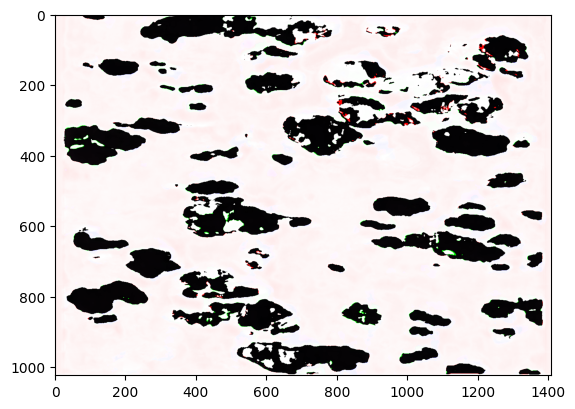

In [49]:
pred = predictions.detach().numpy().squeeze(0).astype(np.uint8) * 255
print(pred.dtype)
plt.imshow(pred.transpose(1,2,0), cmap='gray')

In [36]:
input_image.dtype

torch.float32